# TP1 IIA 2024

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Funciones de generación

## Diagonales

Generar n datos con d inputs:

  - n/2 pertenecientes a la categoría 0. Esta clase corresponde a puntos generados al azar, provenientes de una distribución normal, con centro en el (-1, -1, -1, ... , -1) y matriz de covarianza diagonal, con desviación estándar igual a C * SQRT(d).
  - n/2 pertenecientes a la categoría 1. Esta clase corresponde a puntos generados al azar, provenientes de una distribución normal, con centro en el (1, 1, 1, ... ,1) y matriz de covarianza diagonal, con desviación estándar igual a C * SQRT(d).


In [3]:
def covM(d, C):
  return np.identity(d)*([C*np.sqrt(d)]*d)

def diagonales(n, d, C):
  #Clase0
  c0 = [np.append(x, 0) for x in np.random.multivariate_normal([-1]*d, covM(d, C), int(n/2))]
  #Clase1
  c1 = [np.append(x, 1) for x in np.random.multivariate_normal([1]*d, covM(d, C), int(n/2))]

  flist = c0 + c1
  # Crear DataFrame
  df = pd.DataFrame(flist, columns=[f'dim_{i}' for i in range(d)] + ['class'])
  return df

## Paralelas

Igual al punto anterior, pero las distribuciones tienen centro en el ( 1, 0, 0, .... , 0 ) y en el ( -1, 0, 0, .... , 0 ), respectivamente y la desviación estandar es igual a C independientemente de d.

In [4]:
def covM2(d, C):
  return np.identity(d)*([C]*d)

def paralelas(n, d, C):
  #Clase0
  c0 = [np.append(x, 0) for x in np.random.multivariate_normal([-1] + [0]*(d-1), covM2(d, C), int(n/2))]
  #Clase1
  c1 = [np.append(x, 1) for x in np.random.multivariate_normal([1] + [0]*(d-1), covM2(d, C), int(n/2))]

  flist = c0 + c1
  # Crear DataFrame
  df = pd.DataFrame(flist, columns=[f'dim_{i}' for i in range(d)] + ['class'])
  return df

## Espirales

Generar n datos. De los n puntos generados, n/2 deben pertenecer a cada clase.

Los datos tienen 2 inputs, x e y, que corresponden a puntos generados al azar con una distribución UNIFORME (en dicho sistema de referencia x-y) dentro de un circulo de radio 1.

El output es binario, correspondiendo la clase 0 a los puntos que se encuentran entre las curvas ro = theta/4pi y ro = (theta + pi)/4pi (en polares) y la clase 1 al resto.

In [5]:
def cartesian_to_polar(x, y):
    rho = (x**2 + y**2)**0.5
    theta = math.atan2(y, x)
    return rho, theta

def is_inside_curve(rho, theta, npi):
  rho_curve1 = (theta + (npi-1)*math.pi) / (4 * math.pi)
  rho_curve2 = (theta + npi*math.pi) / (4 * math.pi)
  return rho_curve1 <= rho <= rho_curve2

def is_inside_curves(x, y):
    rho, theta = cartesian_to_polar(x, y)
    return is_inside_curve(rho, theta, 1) or is_inside_curve(rho, theta, 3) or is_inside_curve(rho, theta, 5)

def espirales(n):
  count0 = 0
  count1 = 0
  l = []
  while (count0 + count1) < n:
    x = np.random.uniform(-1, 1, 1)
    y = np.random.uniform(-1, 1, 1)
    if ((x**2 + y**2)**0.5 < 1): # si esta adentro del circulo
      if (is_inside_curves(x, y)):
        if count0 < int(n/2):
          l.append([x, y, 0])
          count0+=1
      else:
        if count1 < int(n/2):
          l.append([x, y, 1])
          count1+=1
  df = pd.DataFrame(l, columns=['dim_1', 'dim_2', 'class'])
  return df

# Ejercicio 1

## Código

In [ ]:
sizes = [150, 600, 3000, 10000]
dataframes_training = [espirales(x) for x in sizes]
dataframe_test = espirales(10000)

<ipython-input-4-d3ff5f2296b3>:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  theta = math.atan2(y, x)


In [ ]:
trees = []
for df in dataframes_training:
  target = df["class"].values.tolist()
  df = df.drop(columns=["class"])
  data = df.to_numpy()
  t = DecisionTreeClassifier(criterion="entropy",min_impurity_decrease=0.002,random_state=0,min_samples_leaf=5)
  t.fit(data, target)
  trees.append(t)

<ipython-input-16-f8e0b01a114f>:8: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(
<ipython-input-16-f8e0b01a114f>:19: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(


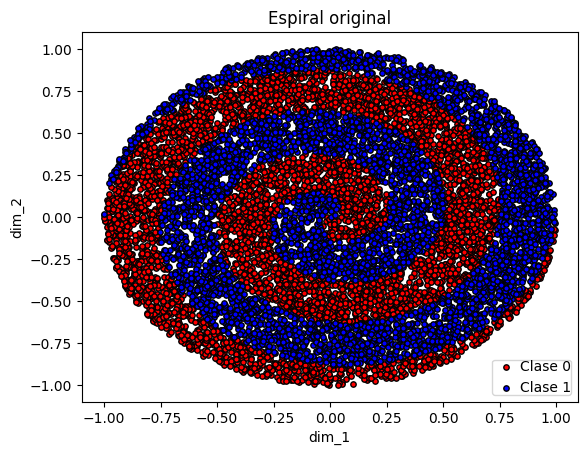

In [ ]:
target = dataframe_test["class"].to_numpy()
feature_names = list(dataframe_test.columns.values)[:-1]
target_names= list(set(dataframe_test["class"].values.tolist()))
dataframe_test_2 = dataframe_test.drop(columns=["class"])
test_data = dataframe_test_2.to_numpy()

idx = np.where(target == 0)
plt.scatter(
    test_data[idx, 0],
    test_data[idx, 1],
    c=['r'],
    label="Clase 0",
    cmap=plt.cm.RdYlBu,
    edgecolor="black",
    s=15,
)

idx = np.where(target == 1)
plt.scatter(
    test_data[idx, 0],
    test_data[idx, 1],
    c=['b'],
    label="Clase 1",
    cmap=plt.cm.RdYlBu,
    edgecolor="black",
    s=15,
)

plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.legend(loc="lower right", borderpad=0, handletextpad=0)
plt.title(f'Espiral original')
plt.show()

<ipython-input-18-468a78d30039>:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(
<ipython-input-18-468a78d30039>:15: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(


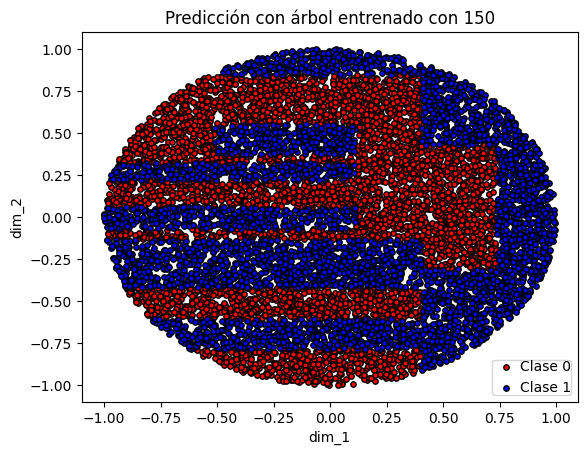

El valor de accuracy obtenido es: 0.6622


<ipython-input-18-468a78d30039>:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(
<ipython-input-18-468a78d30039>:15: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(


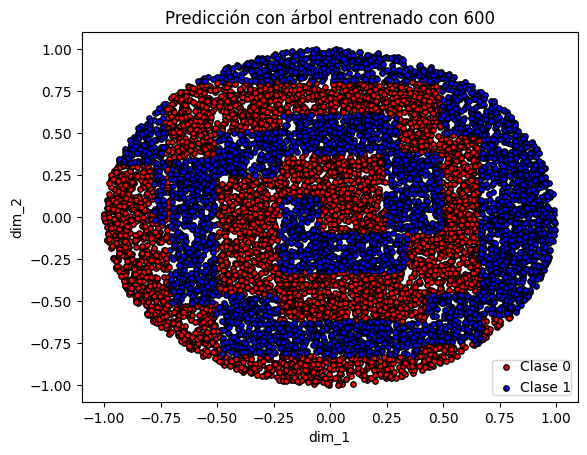

El valor de accuracy obtenido es: 0.8388


<ipython-input-18-468a78d30039>:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(
<ipython-input-18-468a78d30039>:15: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(


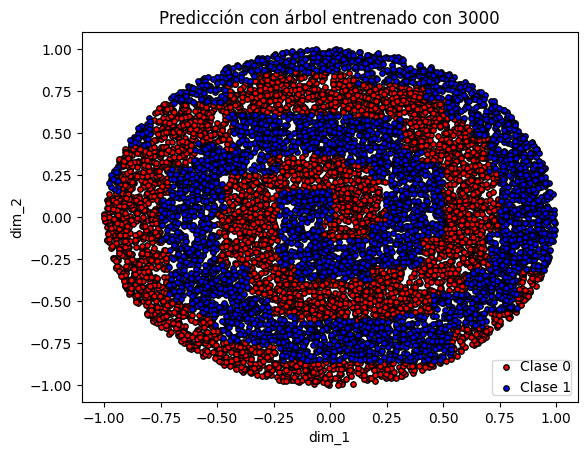

El valor de accuracy obtenido es: 0.9145


<ipython-input-18-468a78d30039>:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(
<ipython-input-18-468a78d30039>:15: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(


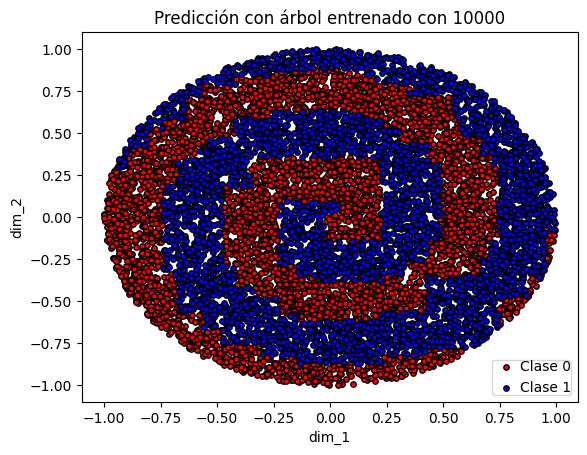

El valor de accuracy obtenido es: 0.925


In [ ]:
for idt, t in enumerate(trees):
  prediction = t.predict(test_data)
  idx = np.where(prediction == 0)
  plt.scatter(
      test_data[idx, 0],
      test_data[idx, 1],
      c=['r'],
      label="Clase 0",
      cmap=plt.cm.RdYlBu,
      edgecolor="black",
      s=15,
  )

  idx = np.where(prediction == 1)
  plt.scatter(
      test_data[idx, 0],
      test_data[idx, 1],
      c=['b'],
      label="Clase 1",
      cmap=plt.cm.RdYlBu,
      edgecolor="black",
      s=15,
  )

  plt.xlabel(feature_names[0])
  plt.ylabel(feature_names[1])
  plt.legend(loc="lower right", borderpad=0, handletextpad=0)
  plt.title(f'Predicción con árbol entrenado con {sizes[idt]}')
  plt.show()

  accuracy = accuracy_score(target, prediction)

  print("El valor de accuracy obtenido es: {}".format(accuracy))

## Análisis

Podemos ver que mientras mas puntos tiene el conjunto de entrenamiento mejor es la accuracy de cada arbol. Esto se ve reflejado en las graficas de las predicciones, por ejemplo en la prediccion del primer arbol, el que fue entrenado con 150 puntos, la grafica no se parece al espiral original en lo absoluto. En la grafica del segundo arbol se puede notar como empieza a tomar un poco mas de forma el espiral, lo cual esta dado por la mejora considerable del accuracy. Por ultimo, el tercer arbol, el generado con 3000 puntos de entrenamiento, tenemos un accuracy superior al 90%, lo cual es muy facil de ver en la grafica ya que es muy similar a los espirales originales.

# Ejercicio 2

## Diagonal

### Generacion de datos

In [28]:
df_test = diagonales(10000, 2, 0.78)
feature_names = list(df_test.columns.values)[:-1]
test_target = df_test["class"].to_numpy()
test_data = df_test.drop(columns=["class"]).to_numpy()

In [29]:
n_sizes = [125, 250, 500, 1000, 2000, 4000]
tree_counts = 20

errors = {}

predictions = {}

for n in n_sizes:
  errors_list = []
  for i in range(tree_counts):
    df_train = diagonales(n, 2, 0.78)
    train_target = df_train["class"].to_numpy()
    train_data = df_train.drop(columns=["class"]).to_numpy()

    t = DecisionTreeClassifier(criterion="entropy",min_impurity_decrease=0.002,random_state=0,min_samples_leaf=5)
    t.fit(train_data, train_target)

    predict_train = t.predict(train_data)
    accuracy_train = accuracy_score(train_target, predict_train)

    predict_test = t.predict(test_data)
    accuracy_test = accuracy_score(test_target, predict_test)

    if len(errors_list) == 0:
      predictions[n] = predict_test

    errors_list.append({'tree_size': t.tree_.node_count, 'error_train': 1-accuracy_train, 'error_test': 1-accuracy_test})
  errors[n] = errors_list

### Gráficas de predicciones

<ipython-input-30-0d607f02f033>:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(
<ipython-input-30-0d607f02f033>:14: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(


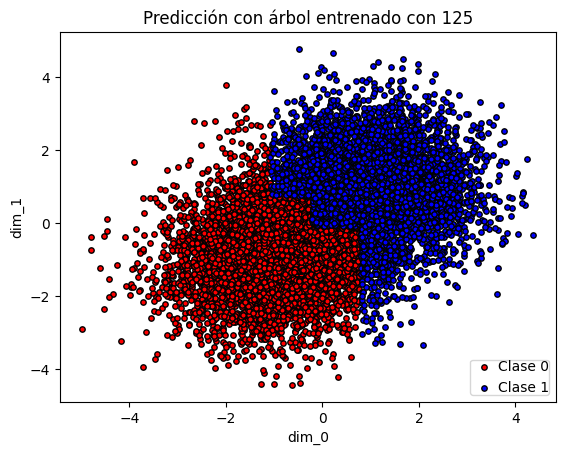

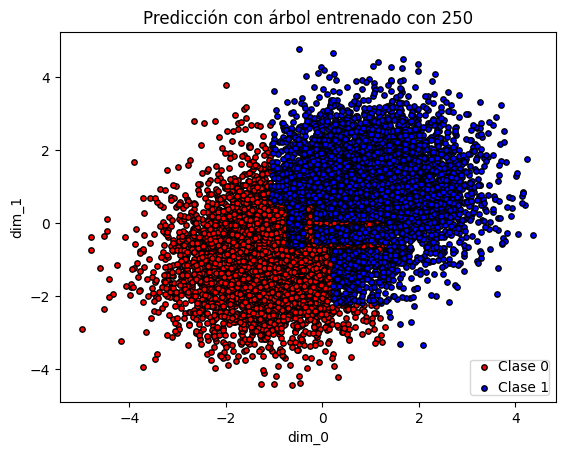

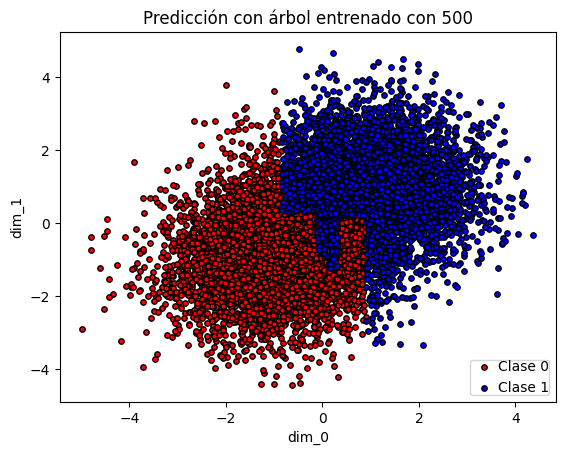

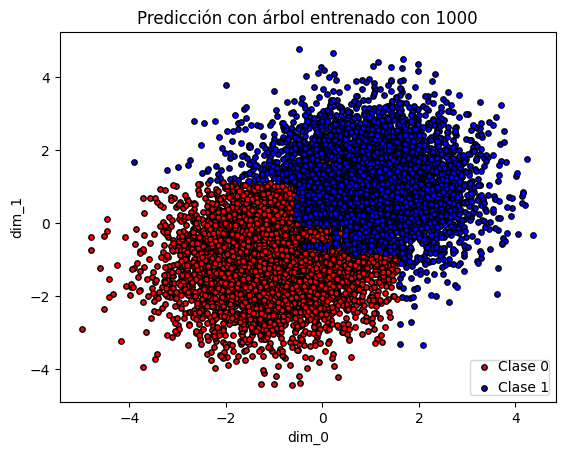

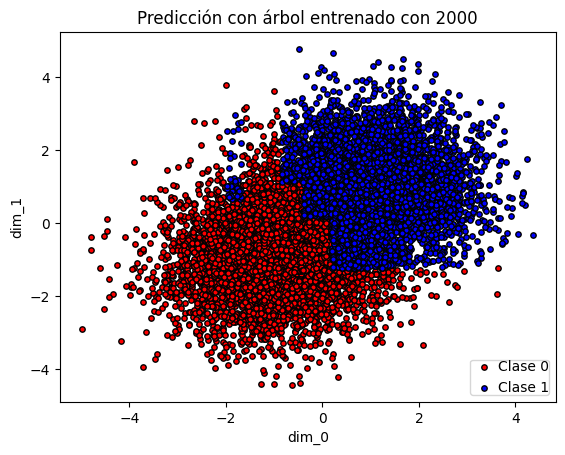

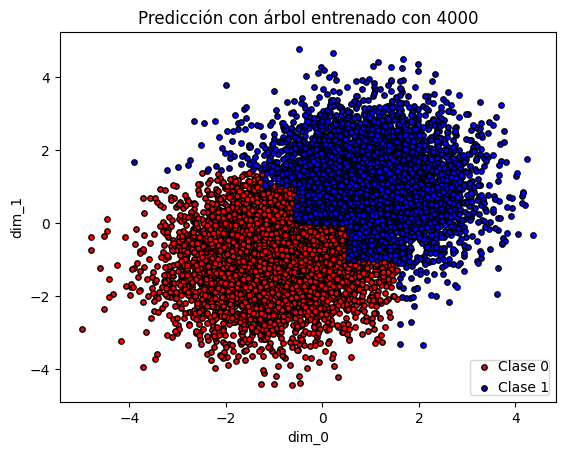

In [30]:
for k, prediction in predictions.items():
  idx = np.where(prediction == 0)
  plt.scatter(
      test_data[idx, 0],
      test_data[idx, 1],
      c=['r'],
      label="Clase 0",
      cmap=plt.cm.RdYlBu,
      edgecolor="black",
      s=15,
  )

  idx = np.where(prediction == 1)
  plt.scatter(
      test_data[idx, 0],
      test_data[idx, 1],
      c=['b'],
      label="Clase 1",
      cmap=plt.cm.RdYlBu,
      edgecolor="black",
      s=15,
  )

  plt.xlabel(feature_names[0])
  plt.ylabel(feature_names[1])
  plt.legend(loc="lower right", borderpad=0, handletextpad=0)
  plt.title(f'Predicción con árbol entrenado con {k}')
  plt.show()

### Análisis de las gráficas

Podemos notar que los arboles entrenados con menos datos generan fronteras de decisiones mucho mas cuadradas, donde no se asemejan para nada a una diagonal. Tambien podemos notar errores donde zonas que estan claramente mas pobladas por puntos de una clase estan siendo clasificados como otra.

Mientras mas datos utilizamos para el entrenamiento podemos ver muchos mas vertices en esta frontera y tambien se puede notar como se asemeja cada vez mas a la recta y=-x

### Promedios

In [31]:
diagonales_avgs = {}
for k, data in errors.items():
  error_test_sum = 0
  error_training_sum = 0
  tree_size_sum = 0
  for d in data:
    error_test_sum += d['error_test']
    error_training_sum += d['error_train']
    tree_size_sum += d['tree_size']
  diagonales_avgs[k] = {'tree_size': tree_size_sum/len(data), 'error_train': error_training_sum/len(data), 'error_test': error_test_sum/len(data)}

## Paralela

### Generacion de datos

In [32]:
df_test = paralelas(10000, 2, 0.78)
feature_names = list(df_test.columns.values)[:-1]
test_target = df_test["class"].to_numpy()
test_data = df_test.drop(columns=["class"]).to_numpy()

In [33]:
n_sizes = [125, 250, 500, 1000, 2000, 4000]
tree_counts = 20

errors = {}

predictions = {}

for n in n_sizes:
  errors_list = []
  for i in range(tree_counts):
    df_train = diagonales(n, 2, 0.78)
    train_target = df_train["class"].to_numpy()
    train_data = df_train.drop(columns=["class"]).to_numpy()

    t = DecisionTreeClassifier(criterion="entropy",min_impurity_decrease=0.002,random_state=0,min_samples_leaf=5)
    t.fit(train_data, train_target)

    predict_train = t.predict(train_data)
    accuracy_train = accuracy_score(train_target, predict_train)

    predict_test = t.predict(test_data)
    accuracy_test = accuracy_score(test_target, predict_test)

    if len(errors_list) == 0:
      predictions[n] = predict_test

    errors_list.append({'tree_size': t.tree_.node_count, 'error_train': 1-accuracy_train, 'error_test': 1-accuracy_test})
  errors[n] = errors_list

### Gráficas de predicciones

<ipython-input-34-0d607f02f033>:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(
<ipython-input-34-0d607f02f033>:14: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(


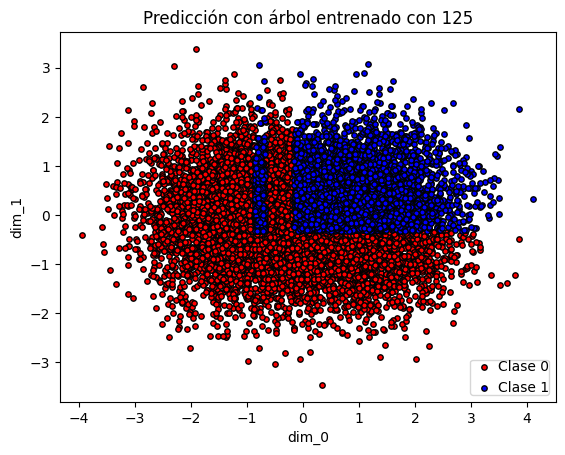

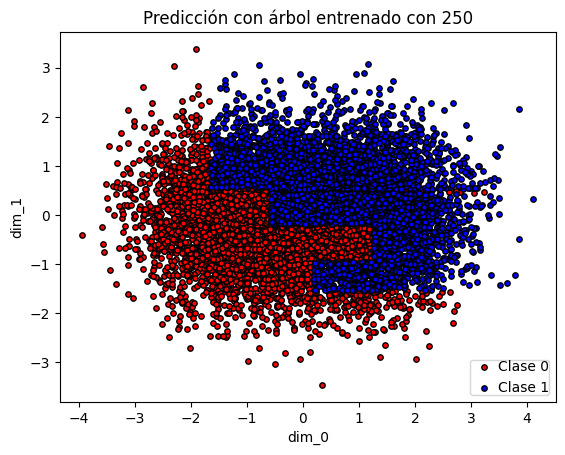

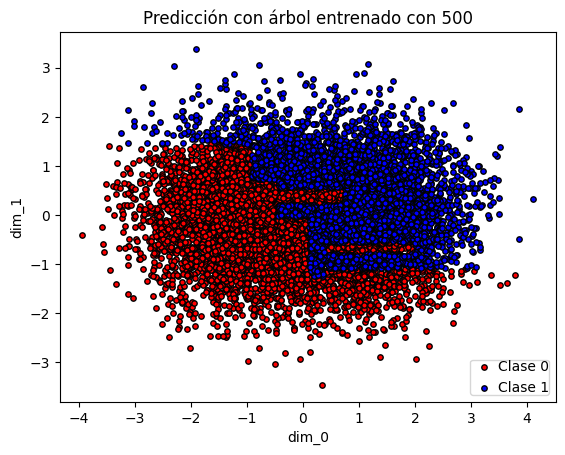

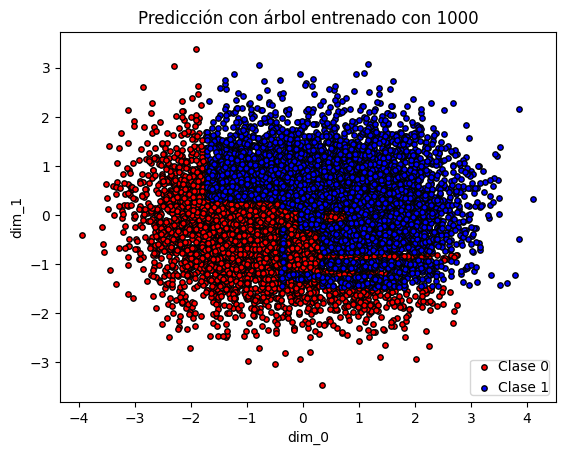

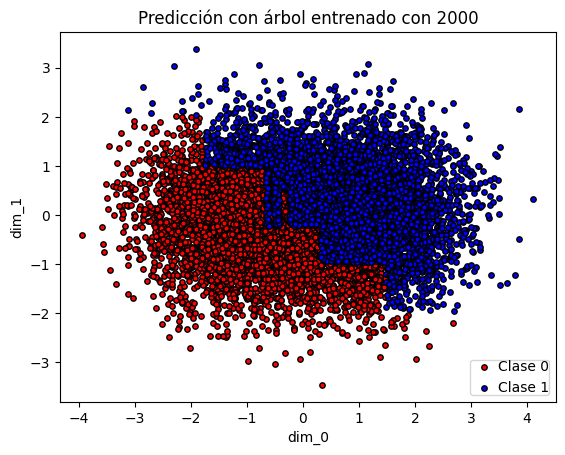

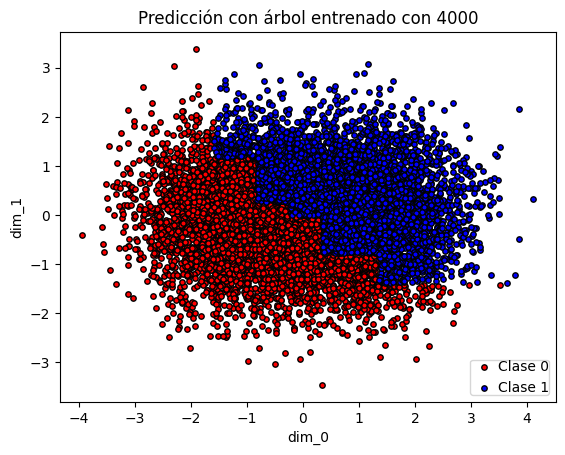

In [34]:
for k, prediction in predictions.items():
  idx = np.where(prediction == 0)
  plt.scatter(
      test_data[idx, 0],
      test_data[idx, 1],
      c=['r'],
      label="Clase 0",
      cmap=plt.cm.RdYlBu,
      edgecolor="black",
      s=15,
  )

  idx = np.where(prediction == 1)
  plt.scatter(
      test_data[idx, 0],
      test_data[idx, 1],
      c=['b'],
      label="Clase 1",
      cmap=plt.cm.RdYlBu,
      edgecolor="black",
      s=15,
  )

  plt.xlabel(feature_names[0])
  plt.ylabel(feature_names[1])
  plt.legend(loc="lower right", borderpad=0, handletextpad=0)
  plt.title(f'Predicción con árbol entrenado con {k}')
  plt.show()

### Análisis de las gráficas

???????????????????????

### Promedios

In [35]:
paralelos_avgs = {}
for k, data in errors.items():
  error_test_sum = 0
  error_training_sum = 0
  tree_size_sum = 0
  for d in data:
    error_test_sum += d['error_test']
    error_training_sum += d['error_train']
    tree_size_sum += d['tree_size']
  paralelos_avgs[k] = {'tree_size': tree_size_sum/len(data), 'error_train': error_training_sum/len(data), 'error_test': error_test_sum/len(data)}

## Análisis de promedios

### Generación de Gráficos

<ipython-input-48-438d080c7369>:6: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(
<ipython-input-48-438d080c7369>:16: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(
<ipython-input-48-438d080c7369>:26: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(
<ipython-input-48-438d080c7369>:36: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(


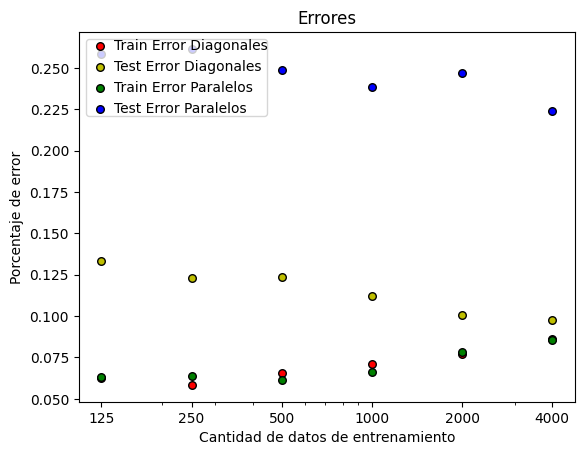

In [48]:
error_train_diagonales_avgs = [d['error_train'] for k, d in diagonales_avgs.items()]
error_test_diagonales_avgs = [d['error_test'] for k, d in diagonales_avgs.items()]
error_train_paralelos_avg = [d['error_train'] for k, d in paralelos_avgs.items()]
error_test_paralelos_avg = [d['error_test'] for k, d in paralelos_avgs.items()]

plt.scatter(
    n_sizes,
    error_train_diagonales_avgs,
    c=['r'],
    label="Train Error Diagonales",
    cmap=plt.cm.RdYlBu,
    edgecolor="black",
    s=30,
)

plt.scatter(
    n_sizes,
    error_test_diagonales_avgs,
    c=['y'],
    label="Test Error Diagonales",
    cmap=plt.cm.RdYlBu,
    edgecolor="black",
    s=30,
)

plt.scatter(
    n_sizes,
    error_train_paralelos_avg,
    c=['g'],
    label="Train Error Paralelos",
    cmap=plt.cm.RdYlBu,
    edgecolor="black",
    s=30,
)

plt.scatter(
    n_sizes,
    error_test_paralelos_avg,
    c=['b'],
    label="Test Error Paralelos",
    cmap=plt.cm.RdYlBu,
    edgecolor="black",
    s=30,
)

plt.xscale('log')
plt.xticks(n_sizes, labels=[str(size) for size in n_sizes])

plt.xlabel('Cantidad de datos de entrenamiento')
plt.ylabel('Porcentaje de error')
plt.legend(loc="upper left", borderpad=0, handletextpad=0)
plt.title(f'Errores')
plt.show()

<ipython-input-49-1bd37b39848d>:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(
<ipython-input-49-1bd37b39848d>:14: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(


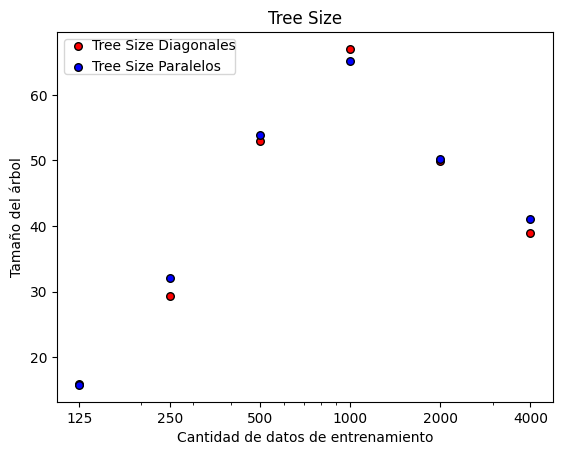

In [49]:
tree_size_diagonales_avgs = [d['tree_size'] for k, d in diagonales_avgs.items()]
tree_size_paralelos_avgs = [d['tree_size'] for k, d in paralelos_avgs.items()]

plt.scatter(
    n_sizes,
    tree_size_diagonales_avgs,
    c=['red'],
    label="Tree Size Diagonales",
    cmap=plt.cm.RdYlBu,
    edgecolor="black",
    s=30,
)

plt.scatter(
    n_sizes,
    tree_size_paralelos_avgs,
    c=['blue'],
    label="Tree Size Paralelos",
    cmap=plt.cm.RdYlBu,
    edgecolor="black",
    s=30,
)

plt.xscale('log')
plt.xticks(n_sizes, labels=[str(size) for size in n_sizes])

plt.xlabel('Cantidad de datos de entrenamiento')
plt.ylabel('Tamaño del árbol')
plt.legend(loc="upper left", borderpad=0, handletextpad=0)
plt.title(f'Tree Size')
plt.show()

### Analisis
????????????????????

# Ejercicio 3

## Generación de datos y promedios de error

In [50]:
C_values = [0.5, 1.0, 1.5, 2.0, 2.5]
d = 5
n_training = 250
n_testing = 10000
tree_count = 20

In [57]:
errors_paralelas = {}

for C in C_values:
  errors_list = []

  df_test = paralelas(n_testing, d, C)
  test_target = df_test["class"].to_numpy()
  test_data = df_test.drop(columns=["class"]).to_numpy()

  for i in range(tree_count):
    df_train = paralelas(n_training, d, C)
    train_target = df_train["class"].to_numpy()
    train_data = df_train.drop(columns=["class"]).to_numpy()

    t = DecisionTreeClassifier(criterion="entropy",min_impurity_decrease=0.002,random_state=0,min_samples_leaf=5)
    t.fit(train_data, train_target)

    predict_test = t.predict(test_data)
    accuracy_test = accuracy_score(test_target, predict_test)

    errors_list.append(1-accuracy_test)
  errors_paralelas[C] = errors_list

errors_paralelas_avg = {}
for k, l in errors_paralelas.items():
  errors_paralelas_avg[k] = sum(l)/tree_count

print(errors_paralelas_avg)

{0.5: [0.09619999999999995, 0.09730000000000005, 0.11040000000000005, 0.131, 0.09409999999999996, 0.10019999999999996, 0.1078, 0.10499999999999998, 0.11339999999999995, 0.08989999999999998, 0.10950000000000004, 0.09699999999999998, 0.10850000000000004, 0.12570000000000003, 0.10409999999999997, 0.11850000000000005, 0.09889999999999999, 0.10709999999999997, 0.10840000000000005, 0.12960000000000005], 1.0: [0.21619999999999995, 0.20479999999999998, 0.23570000000000002, 0.2047, 0.22970000000000002, 0.21540000000000004, 0.19199999999999995, 0.26160000000000005, 0.1976, 0.20830000000000004, 0.22230000000000005, 0.18169999999999997, 0.20189999999999997, 0.20820000000000005, 0.19340000000000002, 0.2237, 0.2237, 0.22709999999999997, 0.19220000000000004, 0.22140000000000004], 1.5: [0.2623, 0.29500000000000004, 0.28500000000000003, 0.28769999999999996, 0.3067, 0.2661, 0.27280000000000004, 0.25239999999999996, 0.25949999999999995, 0.2792, 0.2911, 0.29710000000000003, 0.262, 0.2833, 0.2802, 0.2945, 

In [58]:
errors_diagonales = {}

for C in C_values:
  errors_list = []

  df_test = diagonales(n_testing, d, C)
  test_target = df_test["class"].to_numpy()
  test_data = df_test.drop(columns=["class"]).to_numpy()

  for i in range(tree_count):
    df_train = diagonales(n_training, d, C)
    train_target = df_train["class"].to_numpy()
    train_data = df_train.drop(columns=["class"]).to_numpy()

    t = DecisionTreeClassifier(criterion="entropy",min_impurity_decrease=0.002,random_state=0,min_samples_leaf=5)
    t.fit(train_data, train_target)

    predict_test = t.predict(test_data)
    accuracy_test = accuracy_score(test_target, predict_test)

    errors_list.append(1-accuracy_test)
  errors_diagonales[C] = errors_list

errors_diagonales_avg = {}
for k, l in errors_diagonales.items():
  errors_diagonales_avg[k] = sum(l)/tree_count

print(errors_diagonales_avg)

{0.5: 0.09077999999999999, 1.0: 0.149425, 1.5: 0.20129999999999998, 2.0: 0.23128999999999994, 2.5: 0.264345}


## 3.1 Mínimo error

In [ ]:
#Codigo